In [ ]:
import os
import random
import shutil
from pathlib import Path

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
def split_dataset(source_dir, output_dir, classes_to_keep, train_ratio=0.8):
    # Create output directories
    train_dir = os.path.join(output_dir, 'train')
    val_dir = os.path.join(output_dir, 'val')
    for dir in [train_dir, val_dir]:
        os.makedirs(os.path.join(dir, 'images'), exist_ok=True)
        os.makedirs(os.path.join(dir, 'labels'), exist_ok=True)

    # Get all image files
    image_files = [f for f in os.listdir(os.path.join(source_dir, 'images')) if f.endswith(('.jpg', '.jpeg', '.png'))]

    # Shuffle the list of image files
    random.shuffle(image_files)

    # Calculate the split index
    split_index = int(len(image_files) * train_ratio)

    # Process each image and its corresponding label file
    for i, img_file in enumerate(image_files):
        img_path = os.path.join(source_dir, 'images', img_file)
        label_file = os.path.splitext(img_file)[0] + '.txt'
        label_path = os.path.join(source_dir, 'labels', label_file)

        # Check if the label file exists
        if not os.path.exists(label_path):
            print(f"Warning: No label file found for {img_file}. Skipping.")
            continue

        # Read and filter the label file
        with open(label_path, 'r') as f:
            lines = f.readlines()

        filtered_lines = [line for line in lines if int(line.split()[0]) in classes_to_keep]

        # If there are no objects of interest in this image, skip it
        if not filtered_lines:
            continue

        # Determine whether this sample goes into train or val set
        target_dir = train_dir if i < split_index else val_dir

        # Copy image file
        shutil.copy(img_path, os.path.join(target_dir, 'images', img_file))

        # Write filtered label file
        with open(os.path.join(target_dir, 'labels', label_file), 'w') as f:
            f.writelines(filtered_lines)

    print(f"Dataset split complete. Train set: {split_index}, Validation set: {len(image_files) - split_index}")


source_dir = r'/content/drive/MyDrive/Syook Dataset/CROPPED/'
output_dir = r'/content/drive/MyDrive/Syook Dataset/Cropped_dataset'

# Define the classes

classes_to_keep = [ 1, 4, 6, 7, 9]


split_dataset(source_dir, output_dir, classes_to_keep, train_ratio=0.8)

Dataset split complete. Train set: 1027, Validation set: 257


In [ ]:
import os

def count_labels(dataset_path):
  """Counts the unique labels in a dataset with text files.

  Args:
    dataset_path: The path to the dataset directory.

  Returns:
    A dictionary containing the unique labels and their counts.
  """

  labels = {}
  for root, dirs, files in os.walk(dataset_path):
    for file in files:
      if file.endswith('.txt'):  # Adjust file extension if needed
        file_path = os.path.join(root, file)
        print(f"Processing file: {file_path}")
        with open(file_path, 'r') as f:
          label = f.read().strip()
          print(f"Extracted label: {label}")
          if label not in labels:
            labels[label] = 1
          else:
            labels[label] += 1
  return labels

# Replace '/path/to/your/dataset' with the actual path to your dataset
dataset_path = '/content/drive/MyDrive/Syook Dataset/Cropped_dataset'
label_counts = count_labels(dataset_path)

print("Label counts:")
for label, count in label_counts.items():
  print(f"{label}: {count}")

Streaming output truncated to the last 5000 lines.
Extracted label: 1 1 0.044964028776978415 0.6896551724137931 0.19784172661870503
1 1 0.09892086330935251 0.41379310344827586 0.13309352517985612
Processing file: /content/drive/MyDrive/Syook Dataset/Cropped_dataset/train/labels/001347_person2.txt
Extracted label: 1 0 0.036585365853658534 0.37777777777777777 0.10569105691056911
1 0.5 0.06504065040650407 0.37777777777777777 0.13008130081300814
1 0.13333333333333333 0 0.31111111111111106 0.08943089430894309
Processing file: /content/drive/MyDrive/Syook Dataset/Cropped_dataset/train/labels/001682_person1.txt
Extracted label: 1 0 0.007936507936507936 0.26666666666666666 0.30158730158730157
1 0.49166666666666664 0.10317460317460317 0.2166666666666667 0.1746031746031746
1 0 0.9603174603174603 0.55 0.5238095238095238
1 0 0.19841269841269818 0.2166666666666667 0.20634920634920634
7 0 1 1 1
7 0.48333333333333334 0.5476190476190477 0.9666666666666667 0.7777777777777778
6 0 1 1 0.9365079365079365


In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 640.0 kB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_6

In [ ]:
from ultralytics import YOLO
import yaml
import warnings

warnings.filterwarnings('ignore')

In [ ]:

# Define your dataset configuration
dataset_config = {
    'path': '/content/drive/MyDrive/Syook Dataset/Cropped_dataset',
    'train': '/content/drive/MyDrive/Syook Dataset/Cropped_dataset/train',
    'val': '/content/drive/MyDrive/Syook Dataset/Cropped_dataset/val',
    'names': {
        0: 'hard-hat',
        1: 'glasses',
        2: 'vest',
        3: 'ppe-suit',
        4: 'safety-harness'

    }
}

# Save the dataset configuration to a YAML file
with open('dataset.yaml', 'w') as f:
    yaml.dump(dataset_config, f)

# Load a pretrained YOLOv8 model
model = YOLO('yolov8n.pt')  # Start with a smaller model as we're dealing with simpler images

# Train the model
results = model.train(
    data='dataset.yaml',
    epochs=50,
    imgsz=416,  # Smaller image size as we're working with cropped images
    batch=32,  # Can potentially use larger batch size due to smaller images
    patience=15,  # Early stopping patience
    save_period=1,  # Save model every epoch
    workers=8,
    pretrained=True,
    optimizer='Adam',
    lr0=0.001,
    lrf=0.01,
    momentum=0.937,
    weight_decay=0.0005,
    warmup_epochs=3.0,
    warmup_momentum=0.8,
    warmup_bias_lr=0.1,
    box=7.5,
    cls=0.5,
    dfl=1.5,
    pose=12.0,
    kobj=1.0,
    label_smoothing=0.0,
    nbs=64,
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4,
    degrees=0.0,
    translate=0.1,
    scale=0.5,
    shear=0.0,
    perspective=0.0,
    flipud=0.0,
    fliplr=0.5,
    mosaic=0.5,  # Reduced mosaic augmentation as we're dealing with cropped images
    mixup=0.0,
    copy_paste=0.0,
    auto_augment='randaugment',
    erasing=0.4,
)

# The best model is automatically saved as 'best.pt' in the 'runs/detect/train' directory
print("Training complete. Best model saved.")

Ultralytics YOLOv8.2.81 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=dataset.yaml, epochs=50, time=None, patience=15, batch=32, imgsz=416, save=True, save_period=1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_w

train: Scanning /content/drive/MyDrive/Syook Dataset/Cropped_dataset/train/labels.cache... 862 images, 0 backgrounds, 452 corrupt: 100%|██████████| 865/865 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/Syook Dataset/Cropped_dataset/train/images/-1532-_png_jpg.rf.08a5b6985f24bfe7efefdb45c04469c2_person1.jpg: ignoring corrupt image/label: Label class 7 exceeds dataset class count 5. Possible class labels are 0-4
train: WARNING ⚠️ /content/drive/MyDrive/Syook Dataset/Cropped_dataset/train/images/-1579-_png_jpg.rf.c8f91ec3791bf03ccf9eca6c29f62aec_person0.jpg: ignoring corrupt image/label: Label class 7 exceeds dataset class count 5. Possible class labels are 0-4
train: WARNING ⚠️ /content/drive/MyDrive/Syook Dataset/Cropped_dataset/train/images/-1579-_png_jpg.rf.c8f91ec3791bf03ccf9eca6c29f62aec_person1.jpg: ignoring corrupt image/label: Label class 7 exceeds dataset class count 5. Possible class labels are 0-4
train: WARNING ⚠️ /content/drive/MyDrive/Syook Dataset/Cropped_dataset/train/images/-1597-_png_jpg.rf.3bd5df66feaa51e0d65197b4acaf356f_person0.jpg: ignoring corrupt image/label: Label class 7 exceeds dataset class count 5. Possible class lab


val: Scanning /content/drive/MyDrive/Syook Dataset/Cropped_dataset/val/labels.cache... 223 images, 0 backgrounds, 119 corrupt: 100%|██████████| 223/223 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/MyDrive/Syook Dataset/Cropped_dataset/val/images/-1532-_png_jpg.rf.08a5b6985f24bfe7efefdb45c04469c2_person0.jpg: ignoring corrupt image/label: Label class 7 exceeds dataset class count 5. Possible class labels are 0-4
val: WARNING ⚠️ /content/drive/MyDrive/Syook Dataset/Cropped_dataset/val/images/-2082-_png_jpg.rf.7b89e77b67643cd28c0ce52ed7e588e3_person0.jpg: ignoring corrupt image/label: Label class 7 exceeds dataset class count 5. Possible class labels are 0-4
val: WARNING ⚠️ /content/drive/MyDrive/Syook Dataset/Cropped_dataset/val/images/-2082-_png_jpg.rf.7b89e77b67643cd28c0ce52ed7e588e3_person1.jpg: ignoring corrupt image/label: Label class 7 exceeds dataset class count 5. Possible class labels are 0-4
val: WARNING ⚠️ /content/drive/MyDrive/Syook Dataset/Cropped_dataset/val/images/-2082-_png_jpg.rf.7b89e77b67643cd28c0ce52ed7e588e3_person2.jpg: ignoring corrupt image/label: Label class 7 exceeds dataset class count 5. Possible class labels are 0-4
val:

optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 0 dataloader workers
Logging results to runs/detect/train6
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      2.151      3.294      1.814        220        416: 100%|██████████| 13/13 [02:43<00:00, 12.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.89s/it]

                   all        104        454    0.00978      0.672     0.0391     0.0147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      1.983      2.288      1.667        177        416: 100%|██████████| 13/13 [02:33<00:00, 11.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:14<00:00,  7.04s/it]

                   all        104        454     0.0113       0.52     0.0483     0.0146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G      1.863      1.982      1.649        155        416: 100%|██████████| 13/13 [02:32<00:00, 11.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.84s/it]

                   all        104        454     0.0131      0.526      0.177      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G      1.758      1.858      1.571        155        416: 100%|██████████| 13/13 [02:35<00:00, 11.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.69s/it]

                   all        104        454      0.855      0.203      0.312      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      1.711      1.781      1.557        112        416: 100%|██████████| 13/13 [02:31<00:00, 11.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.55s/it]

                   all        104        454      0.654      0.229      0.352      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G      1.681      1.782      1.516        163        416: 100%|██████████| 13/13 [02:31<00:00, 11.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.81s/it]

                   all        104        454      0.511      0.273      0.343      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      1.661      1.788      1.509        169        416: 100%|██████████| 13/13 [02:30<00:00, 11.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.63s/it]

                   all        104        454      0.389      0.363      0.337      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G      1.655      1.728      1.481        152        416: 100%|██████████| 13/13 [02:35<00:00, 11.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.92s/it]

                   all        104        454      0.632      0.214      0.327      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G      1.625      1.732      1.504        177        416: 100%|██████████| 13/13 [02:30<00:00, 11.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.81s/it]

                   all        104        454      0.458      0.275      0.314      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G      1.637      1.699      1.515        166        416: 100%|██████████| 13/13 [02:29<00:00, 11.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.96s/it]

                   all        104        454      0.658      0.251      0.336      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G      1.649       1.71      1.509        193        416: 100%|██████████| 13/13 [02:32<00:00, 11.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:14<00:00,  7.49s/it]

                   all        104        454       0.55      0.273      0.366      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G      1.614      1.722      1.478        194        416: 100%|██████████| 13/13 [02:33<00:00, 11.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.83s/it]

                   all        104        454      0.548      0.326      0.397      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G      1.597        1.7      1.464        181        416: 100%|██████████| 13/13 [02:31<00:00, 11.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:12<00:00,  6.26s/it]

                   all        104        454      0.565      0.322      0.414      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G      1.588      1.691      1.454        167        416: 100%|██████████| 13/13 [02:30<00:00, 11.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.61s/it]

                   all        104        454      0.521       0.37      0.443      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G      1.608      1.685      1.461        154        416: 100%|██████████| 13/13 [02:32<00:00, 11.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:12<00:00,  6.18s/it]

                   all        104        454       0.47      0.348      0.397      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G      1.596      1.653      1.455        132        416: 100%|██████████| 13/13 [02:33<00:00, 11.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:12<00:00,  6.30s/it]

                   all        104        454      0.518      0.352      0.425      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G      1.575      1.654      1.441        185        416: 100%|██████████| 13/13 [02:33<00:00, 11.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.71s/it]

                   all        104        454      0.497      0.359      0.414      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G      1.539      1.623       1.44        150        416: 100%|██████████| 13/13 [02:30<00:00, 11.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.50s/it]

                   all        104        454      0.521      0.383      0.454      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G      1.577       1.64      1.477        209        416: 100%|██████████| 13/13 [02:31<00:00, 11.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.92s/it]

                   all        104        454      0.526      0.351      0.447      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G      1.535      1.617      1.428        154        416: 100%|██████████| 13/13 [02:31<00:00, 11.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.95s/it]

                   all        104        454      0.534      0.346      0.442      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G      1.537      1.595      1.411        137        416: 100%|██████████| 13/13 [02:30<00:00, 11.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.75s/it]

                   all        104        454      0.551      0.387      0.456      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G      1.508      1.602      1.406        140        416: 100%|██████████| 13/13 [02:31<00:00, 11.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:12<00:00,  6.46s/it]

                   all        104        454       0.53      0.352      0.432      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G      1.532      1.598      1.418        174        416: 100%|██████████| 13/13 [02:30<00:00, 11.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.93s/it]

                   all        104        454      0.543        0.4      0.457      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G      1.506      1.595      1.413        134        416: 100%|██████████| 13/13 [02:31<00:00, 11.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.80s/it]

                   all        104        454      0.565       0.37      0.456      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G      1.495      1.561      1.379        137        416: 100%|██████████| 13/13 [02:33<00:00, 11.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.89s/it]

                   all        104        454      0.605       0.37      0.458      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G      1.461      1.487      1.359        170        416: 100%|██████████| 13/13 [02:32<00:00, 11.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.51s/it]

                   all        104        454      0.498      0.399      0.446      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G      1.496      1.541       1.41        140        416: 100%|██████████| 13/13 [02:33<00:00, 11.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:12<00:00,  6.27s/it]

                   all        104        454      0.554      0.363      0.456      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G      1.474      1.518      1.383        153        416: 100%|██████████| 13/13 [02:32<00:00, 11.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:12<00:00,  6.12s/it]

                   all        104        454      0.532      0.328      0.435      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G      1.449      1.476      1.375        199        416: 100%|██████████| 13/13 [02:36<00:00, 12.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.84s/it]

                   all        104        454      0.585      0.357      0.467      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G      1.462      1.485      1.386        125        416: 100%|██████████| 13/13 [02:30<00:00, 11.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.84s/it]

                   all        104        454      0.535      0.361      0.464      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G       1.46      1.464      1.389        152        416: 100%|██████████| 13/13 [02:31<00:00, 11.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.81s/it]

                   all        104        454      0.612      0.385      0.483      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G      1.415      1.461      1.339        186        416: 100%|██████████| 13/13 [02:29<00:00, 11.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.72s/it]

                   all        104        454      0.572      0.383      0.476      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G      1.429      1.465      1.362        160        416: 100%|██████████| 13/13 [02:30<00:00, 11.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.73s/it]

                   all        104        454       0.59      0.357      0.465        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G      1.396      1.447      1.332        164        416: 100%|██████████| 13/13 [02:30<00:00, 11.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.75s/it]

                   all        104        454      0.505       0.37      0.458      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G      1.434      1.443      1.362        203        416: 100%|██████████| 13/13 [02:32<00:00, 11.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.78s/it]

                   all        104        454      0.539      0.399       0.48      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G      1.374      1.422      1.325        138        416: 100%|██████████| 13/13 [02:31<00:00, 11.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:12<00:00,  6.46s/it]

                   all        104        454      0.528      0.401      0.469      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G      1.346      1.409      1.327        116        416: 100%|██████████| 13/13 [02:36<00:00, 12.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:12<00:00,  6.21s/it]

                   all        104        454      0.637      0.355      0.469      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G      1.396      1.417       1.33        155        416: 100%|██████████| 13/13 [02:33<00:00, 11.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:16<00:00,  8.45s/it]

                   all        104        454      0.557      0.391      0.477      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G      1.389      1.407      1.329        216        416: 100%|██████████| 13/13 [02:32<00:00, 11.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.78s/it]

                   all        104        454      0.551      0.403      0.485      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G      1.364      1.405      1.332        142        416: 100%|██████████| 13/13 [02:33<00:00, 11.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.65s/it]

                   all        104        454      0.525      0.401      0.474      0.307


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G      1.329       1.51      1.304         86        416: 100%|██████████| 13/13 [02:31<00:00, 11.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.60s/it]

                   all        104        454      0.591      0.352      0.457      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G      1.346      1.495      1.322         99        416: 100%|██████████| 13/13 [02:30<00:00, 11.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.80s/it]

                   all        104        454      0.622      0.348      0.459      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G      1.292      1.414       1.28         79        416: 100%|██████████| 13/13 [02:31<00:00, 11.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:14<00:00,  7.00s/it]

                   all        104        454      0.516      0.403      0.464      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G      1.324      1.426      1.296         95        416: 100%|██████████| 13/13 [02:29<00:00, 11.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.69s/it]

                   all        104        454       0.61      0.393      0.485      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G      1.309      1.454      1.316         86        416: 100%|██████████| 13/13 [02:28<00:00, 11.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.60s/it]

                   all        104        454       0.65       0.38      0.481      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G      1.284      1.415      1.298         83        416: 100%|██████████| 13/13 [02:29<00:00, 11.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.57s/it]

                   all        104        454      0.561      0.416      0.481      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G      1.283      1.389      1.268         84        416: 100%|██████████| 13/13 [02:33<00:00, 11.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.85s/it]

                   all        104        454      0.496      0.429      0.477       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G      1.305      1.384      1.288         84        416: 100%|██████████| 13/13 [02:30<00:00, 11.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.85s/it]

                   all        104        454      0.548      0.411      0.483      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G      1.269      1.367      1.264         97        416: 100%|██████████| 13/13 [02:29<00:00, 11.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.72s/it]

                   all        104        454      0.544      0.423      0.489      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G      1.277      1.382      1.279         82        416: 100%|██████████| 13/13 [02:29<00:00, 11.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.80s/it]

                   all        104        454      0.539      0.427      0.492       0.32



50 epochs completed in 2.313 hours.
Optimizer stripped from runs/detect/train6/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train6/weights/best.pt, 6.2MB

Validating runs/detect/train6/weights/best.pt...
Ultralytics YOLOv8.2.81 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:12<00:00,  6.25s/it]


                   all        104        454      0.539      0.427      0.493       0.32
               glasses        104        454      0.539      0.427      0.493       0.32
Speed: 1.1ms preprocess, 97.5ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train6
Training complete. Best model saved.


In [ ]:
model.save('/content/drive/MyDrive/Syook Dataset/PPE Detection/PPE_model.pt')


image 1/1 /content/drive/MyDrive/Syook Dataset/datasets/cropped_1.jpg: 416x128 1 glasses, 94.3ms
Speed: 1.7ms preprocess, 94.3ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 128)


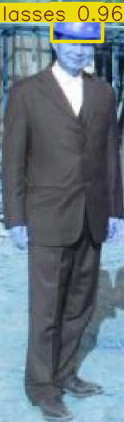

Result saved as result.jpg


In [ ]:
import cv2
from google.colab.patches import cv2_imshow  # This is for displaying images in Colab

# Define your test image
test_image = '/content/drive/MyDrive/Syook Dataset/datasets/cropped_1.jpg'

# Run inference
results = model(test_image)

# Plot the results
res_plotted = results[0].plot()

# Convert BGR to RGB (cv2 uses BGR by default)
res_plotted_rgb = cv2.cvtColor(res_plotted, cv2.COLOR_BGR2RGB)

# Display the image
cv2_imshow(res_plotted_rgb)


cv2.imwrite('result.jpg', res_plotted)
print("Result saved as result.jpg")